In [87]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [88]:
img_inf = cv2.imread('../Hackathon/Ultasonic/data/train/infected/img1.jpg')
img_inf = cv2.cvtColor(img_inf,cv2.COLOR_BGR2RGB)

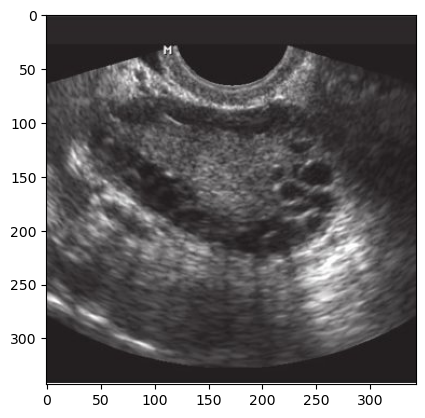

In [89]:
plt.imshow(img_inf)

In [90]:
img_nf = cv2.imread('../Hackathon/Ultasonic/data/train/notinfected/img3.jpg')
img_nf = cv2.cvtColor(img_nf,cv2.COLOR_BGR2RGB)

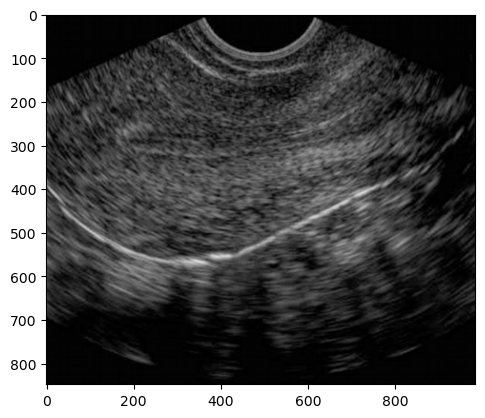

In [91]:
plt.imshow(img_nf)

In [92]:
from keras.preprocessing.image import ImageDataGenerator

In [93]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               rescale=1/255,
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True,
                               fill_mode='nearest' 
                              )

In [94]:
image_gen.flow_from_directory('../Hackathon/Ultasonic/data/train/')

Found 1924 images belonging to 2 classes.


In [95]:
image_gen.flow_from_directory('../Hackathon/Ultasonic/data/test/')

Found 1922 images belonging to 2 classes.


In [96]:
image_shape = (120,120,3)

In [97]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [98]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(120,120,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(120,120,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(120,120,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 59, 59, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 64)       

In [100]:
batch_size = 7

train_image_gen = image_gen.flow_from_directory('../Hackathon/Ultasonic/data/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1924 images belonging to 2 classes.


In [101]:
test_image_gen = image_gen.flow_from_directory('../Hackathon/Ultasonic/data/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 1922 images belonging to 2 classes.


In [102]:
train_image_gen.class_indices

{'infected': 0, 'notinfected': 1}

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
results = model.fit_generator(train_image_gen,epochs=10,
                              validation_data=test_image_gen,
                             validation_steps=16)

Epoch 1/10
275/275 [==============================] - 101s 359ms/step - loss: 0.1976 - accuracy: 0.9163 - val_loss: 0.0459 - val_accuracy: 0.9732
Epoch 2/10
275/275 [==============================] - 127s 463ms/step - loss: 0.0100 - accuracy: 0.9979 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 3/10
275/275 [==============================] - 119s 432ms/step - loss: 0.0420 - accuracy: 0.9880 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4/10
275/275 [==============================] - 105s 384ms/step - loss: 0.0318 - accuracy: 0.9896 - val_loss: 0.0180 - val_accuracy: 0.9911
Epoch 5/10
275/275 [==============================] - 103s 372ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 6/10
275/275 [==============================] - 79s 286ms/step - loss: 0.0181 - accuracy: 0.9964 - val_loss: 1.0843e-04 - val_accuracy: 1.0000
Epoch 7/10
275/275 [==============================] - 81s 295ms/step - loss: 0.0169 - accuracy: 0.9932 - val_loss: 0.0054

In [105]:
results

In [106]:
results.history

{'loss': [0.19759812951087952,
  0.010036124847829342,
  0.042018067091703415,
  0.03184553235769272,
  0.011597584933042526,
  0.018092168495059013,
  0.016944801434874535,
  0.007021285593509674,
  0.012037491425871849,
  0.01737286150455475],
 'accuracy': [0.9163201451301575,
  0.9979209899902344,
  0.9880457520484924,
  0.9896050095558167,
  0.9963617324829102,
  0.9963617324829102,
  0.9932432174682617,
  0.9968814849853516,
  0.9968814849853516,
  0.9958419799804688],
 'val_loss': [0.04590439051389694,
  0.003537703538313508,
  0.0011822778033092618,
  0.017961565405130386,
  0.009137289598584175,
  0.00010842645860975608,
  0.0053929975256323814,
  0.00024790051975287497,
  0.075717493891716,
  0.0019297251710668206],
 'val_accuracy': [0.9732142686843872,
  1.0,
  1.0,
  0.9910714030265808,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9910714030265808,
  1.0]}

In [107]:
train_image_gen.class_indices

{'infected': 0, 'notinfected': 1}

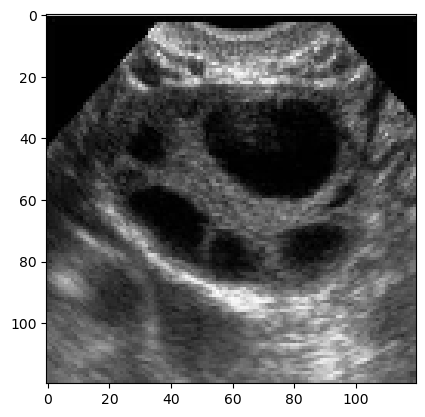

In [108]:
import numpy as np
from keras.preprocessing import image

file = '../Hackathon/Ultasonic/data/test/infected/img5.jpg'
check = cv2.imread(file)
check = cv2.cvtColor(check,cv2.COLOR_BGR2RGB)

img = image.load_img(file, target_size=(120, 120))
plt.imshow(img)

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255

In [109]:
r=(model.predict(img) > 0.5).astype("int32")
if r==0:
    text='infected'
else:
    text='notinfected'
print(text)

1/1 [==============================] - 0s 161ms/step
infected


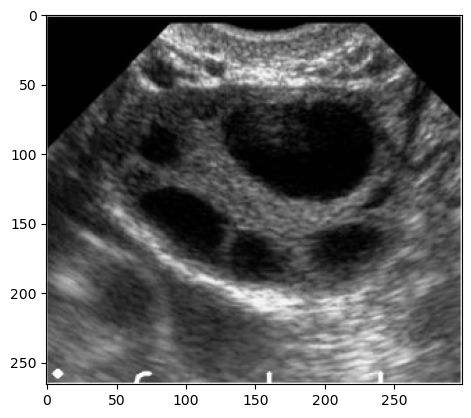

In [110]:
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(check,text=text,org=(0,300), fontFace=font,fontScale= 2,color=(255,255,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(check)

1/1 [==============================] - 0s 48ms/step


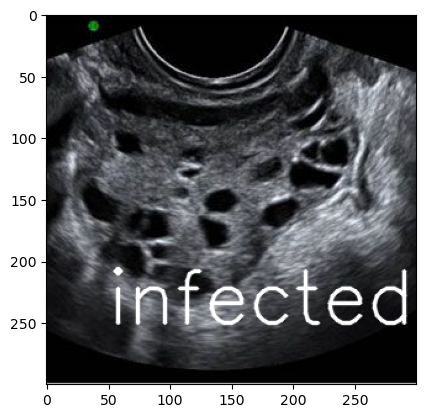

In [114]:
file = '../Hackathon/Ultasonic/data/test/infected/img2.jpg'
check = cv2.imread(file)
check = cv2.cvtColor(check,cv2.COLOR_BGR2RGB)

img = image.load_img(file, target_size=(120, 120))

img = image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = img/255
r=(model.predict(img) > 0.5).astype("int32")
if r==0:
    text='infected'
else:
    text='notinfected'
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(check,text=text,org=(50,250), fontFace=font,fontScale= 2,color=(255,255,255),thickness=2,lineType=cv2.LINE_AA)
plt.imshow(check)

In [ ]:
converter= tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model=converter.convert()


In [ ]:
#with open("model.tflite",'wb')as f:
   # f.write(tflite_model)